In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
#from pyearth import Earth

In [57]:
train = pd.read_csv('data/train.csv')
train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5


In [58]:
test = pd.read_csv('data/test.csv')
test.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02


In [59]:
train = train.dropna()
print(train.shape[0])

2857


In [60]:
y_train = train['y']
X_train = train.drop(['y', 'id'], axis = 1)
print(X_train.shape[0])

X_test = test

2857


In [147]:
corr = abs(train.corrwith(train['y']))
top_20 = corr.sort_values(ascending = False).head(21)[1:]
print(top_20)

x102    0.386480
x146    0.386226
x619    0.365515
x687    0.365401
x651    0.353274
x696    0.353274
x014    0.351081
x118    0.335609
x724    0.335609
x561    0.325541
x670    0.322668
x755    0.321254
x581    0.320483
x096    0.315246
x569    0.312632
x543    0.306396
x105    0.304655
x756    0.299852
x742    0.289128
x702    0.288601
dtype: float64


<AxesSubplot: >

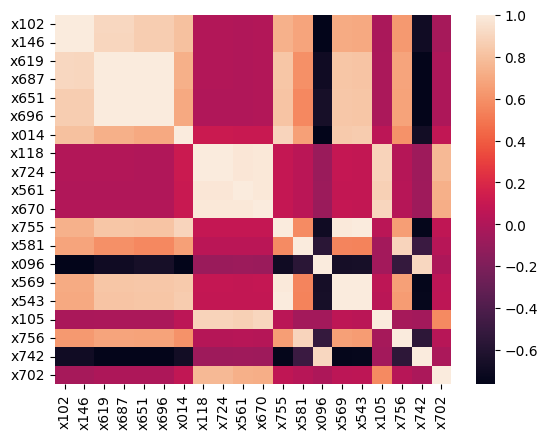

In [150]:
sns.heatmap(X_train[['x102', 'x146', 'x619', 'x687', 'x651', 'x696', 'x014', 'x118', 'x724', 'x561', 'x670', 'x755', 'x581', 'x096', \
                     'x569', 'x543', 'x105', 'x756', 'x742', 'x702']].corr())

In [152]:
X_train = X_train[['x102', 'x014', 'x118', 'x581', 'x096', 'x569', 'x702']]